# PVeS_Generations_Plot

Kurtis Bartlett

2016/9/7

Ipython notebook for generating world history plot of the parity-violating electron scattering experiments.

In [3]:
#Import the necessary packages
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sns

In [4]:
#Keep matplotlib plot inline
%matplotlib inline

In [5]:
#These are the Tableau Color Blind 10 
#from http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html

tableau10 = [(0,107,164),(255,128,14),(171,171,171),
                   (89,89,89),(95,158,209),(200,82,0),(137,137,137),
                   (162, 200, 236),(255,188,121),(207,207,207)]

In [6]:
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)    

#Experimental data and sources:

## 1st Generation:
E122: 

Mainz-Be: Acorr = (−3.5 ± 0.7 ± 0.2) × 10−6 REF: Nuc Phys. B327 1 (1989)

MIT Bates-12C:  Aexpt=0.60±0.14±0.02 ppm REF: Phys. Rev. Lett. 65, 694

## 2nd Generation:
A4: Aphys=(−5.44±0.54stat±0.26sys)×10−6 REF: Phys. Rev. Lett. 93, 022002 ALR(e⃗ p)=[−1.36±0.29(stat)±0.13(syst)]×10−6 REF: Phys. Rev. Lett. 94, 152001 ALR=(−17.23±0.82stat±0.89syst)×10−6 REF: Phys. Rev. Lett. 102, 151803

HAPPEX: APV=−15.05±0.98(stat)±0.56(syst)ppm REF: Phys. Rev. C 69, 065501 (2004)

HAPPEX-II: (APV = 1.4x10-6 7%)? H::APV=(−1.14±0.24(stat)±0.06(syst))×10−6 REF: Phys. Lett. B 635 (2006) 275 He::APV=(6.72±0.84(stat)±0.21(syst))×10−6 REF: Phys. Rev. Lett. 96 (2006) 022003 H-2::APV=(−1.58±0.12(stat)±0.04(syst))×10−6 He-2::APV=(+6.40±0.23(stat)±0.12(syst))×10−6 REF-2: Phys. Rev. Lett. 98 (2007) 032301 

HAPPEX-III: (A_PV = -23.80 +/- 0.78 (stat) +/- 0.36 (syst))x10-6 REF: Z. Ahmed et al. (HAPPEX Collaboration)
Phys. Rev. Lett. 108, 102001

G0: REF: PRL 95, 092001 (2005)

SAMPLE:

## 3rd Generation:
PREX-I: APV = (0.656±0.060(stat)±0.014(syst))x10-6 REF: Phys. Rev. Lett. 108, 112502 (2012)

PVDIS-6: APV = (-91.1±3.1 stat.±3.0 syst.)×10−6 & APV = (-160.8±6.4 stat.±3.1 syst.)×10−6 REF: Nature 506, 67–70 (06 February 2014) doi:10.1038/nature12964

SLAC E158: APV = (−1.31±0.14 stat.±0.10 syst.)×10−7 REF:  P.L. Anthony et al., Phys. Rev. Lett. 95, 081601 (2005)

QWEAK:

## 4th Generation:
CREX: APV = 2x10-6 2.4% REF: http://hallaweb.jlab.org/parity/prex/c-rex2013_v7.pdf

MESA-P2:

MESA-12C:

MOLLER: APV = 33±0.7x10-9 REF: http://arxiv.org/abs/1411.4088 

PREX-II: APV = 0.51x10-6 3% REF: http://hallaweb.jlab.org/parity/prex/prexII.pdf

SOLID:

In [7]:
# 1st Generation
A_Mainz_Be = 3.5E-6
dA_Mainz_Be = 0.7E-6
A_MIT_12C = 0.60E-6
dA_MIT_12C = 0.14E-6
# 2nd Generation
A_A4 = [5.44E-6, 1.36E-6, 17.23E-6]
dA_A4 = [0.60E-6, 0.32E-6, 1.21E-6]
A_HAPPEx = 15.05E-6
dA_HAPPEx = 1.13E-6
A_HAPPExII = [1.14E-6, 6.72E-6, 1.58E-6, 6.40E-6]
dA_HAPPExII =[0.25E-6, 0.87E-6, 0.13E-6, 0.26E-6]
A_HAPPExIII = 23.80E-6
dA_HAPPExIII = 0.86E-6
# 3rd Generation
A_E158 = 1.31E-7
dA_E158 = 0.172E-7
A_PRExI = 0.656E-6
dA_PRExI = 0.062E-6
A_PVDIS6 = [91.1E-6, 160.8E-6]
dA_PVDIS6 = [4.3E-6, 7.1E-6]
# 4th Generation
A_CREx = 2.0E-6
dA_CREx = 0.048E-6
A_MOLLER = 33.0E-9
dA_MOLLER = 0.7E-9
A_PRExII = 0.51E-6
dA_PRExII = 0.015E-6

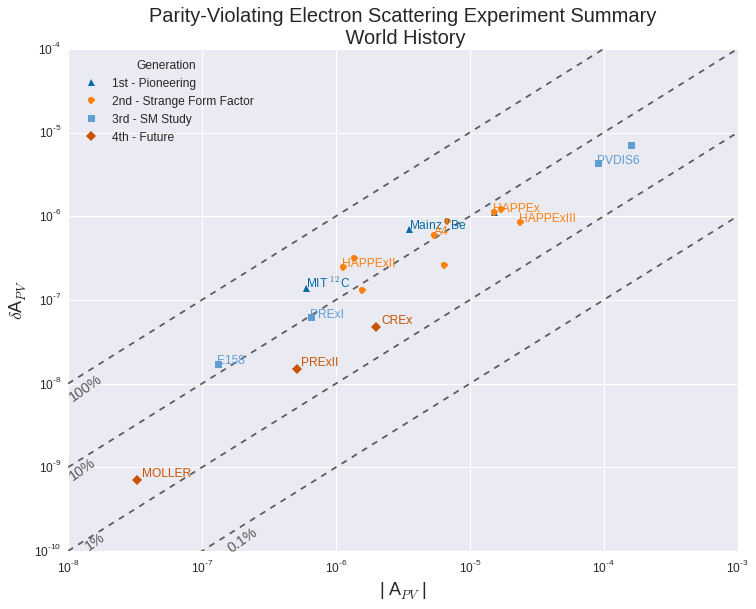

In [10]:
#Plot figure using matplotlibs
pp.figure(figsize=(12, 9))
#Uncertainty Lines
line_100, = pp.plot([1e-8,1e-3],[1e-8,1e-3], label='100%', ls='dashed', color=tableau10[3])
pp.text(1e-8,1e-8,'100%',rotation=35, fontsize='x-large', color=tableau10[3])
line_10, = pp.plot([1e-8,1e-3],[1e-9,1e-4], label='10%', ls='dashed', color=tableau10[3])
pp.text(1e-8,1e-9,'10%',rotation=35, fontsize='x-large', color=tableau10[3])
line_1, = pp.plot([1e-8,1e-3],[1e-10,1e-5], label='1%', ls='dashed', color=tableau10[3])
pp.text((1.3*1e-8),(1.3*1e-10),'1%',rotation=35, fontsize='x-large', color=tableau10[3])
line_01, = pp.plot([1e-8,1e-3],[1e-11,1e-6], label='0.1%', ls='dashed', color=tableau10[3])
pp.text((1.5*1e-7),(1.5*1e-10),'0.1%',rotation=35, fontsize='x-large', color=tableau10[3])

#Plots of Experiment's Data
# 1st Generation - Pioneering Techinques
E122_plot, = pp.loglog(A_HAPPEx, dA_HAPPEx, marker='^', ls='None', color=tableau10[0])#test need to fix

Mainz_Be_plot, = pp.loglog(A_Mainz_Be, dA_Mainz_Be, marker='^', ls='None', color=tableau10[0])
pp.text(A_Mainz_Be, dA_Mainz_Be, 'Mainz $^{9}$Be', color=tableau10[0], fontsize=12)
MIT_12C_plot = pp.loglog(A_MIT_12C, dA_MIT_12C, marker='^', ls='None', color=tableau10[0])
pp.text(A_MIT_12C, dA_MIT_12C, 'MIT $^{12}$C', color=tableau10[0], fontsize=12)

# 2nd Generation - Strange Form Factor(1998-2009)
HAPPEx_plot, = pp.loglog(A_HAPPEx, dA_HAPPEx, marker='o', ls='None', color=tableau10[1])
pp.text(A_HAPPEx, dA_HAPPEx, 'HAPPEx', color=tableau10[1], fontsize=12)
HAPPExII_plot, = pp.loglog(A_HAPPExII, dA_HAPPExII, marker='o', ls='None', color=tableau10[1])
pp.text(A_HAPPExII[0], dA_HAPPExII[0], 'HAPPExII', color=tableau10[1], fontsize=12)
HAPPExIII_plot, = pp.loglog(A_HAPPExIII, dA_HAPPExIII, marker='o', ls='None', color=tableau10[1])
pp.text(A_HAPPExIII, dA_HAPPExIII, 'HAPPExIII', color=tableau10[1], fontsize=12)
A4_plot = pp.loglog(A_A4, dA_A4, marker = 'o', ls='None', color=tableau10[1])
pp.text(A_A4[0], dA_A4[0], 'A4', color=tableau10[1], fontsize=12)

# 3rd Generation - Standard Model Tests(2003-2005),JLab(2010-2012)
PRExI_plot, = pp.loglog(A_PRExI, dA_PRExI, marker='s', ls='None', color=tableau10[4])
pp.text(A_PRExI, dA_PRExI, 'PRExI', color=tableau10[4], fontsize=12)
E158_plot, = pp.loglog(A_E158, dA_E158, marker='s', ls='None', color=tableau10[4])
pp.text(A_E158, dA_E158, 'E158', color=tableau10[4], fontsize=12)
PVDIS6_plot = pp.loglog(A_PVDIS6, dA_PVDIS6, marker='s', ls='None', color=tableau10[4])
pp.text(A_PVDIS6[0], dA_PVDIS6[0], 'PVDIS6', color=tableau10[4], fontsize=12)

# 4th Generation - Future
PRExII_plot, = pp.loglog(A_PRExII, dA_PRExII, marker='D',ls='None', color=tableau10[5])
pp.text((1.1*A_PRExII), (1.1*dA_PRExII), 'PRExII', color=tableau10[5], fontsize=12)
CREx_plot, = pp.loglog(A_CREx, dA_CREx, marker='D', ls='None', color=tableau10[5])
pp.text((1.1*A_CREx), (1.1*dA_CREx), 'CREx', color=tableau10[5], fontsize=12)
MOLLER_plot = pp.loglog(A_MOLLER,dA_MOLLER, marker='D', ls='None', color=tableau10[5])
pp.text((1.1*A_MOLLER), (1.1*dA_MOLLER), 'MOLLER', color=tableau10[5], fontsize=12)

#Plot Decorations
pp.xlabel('| A$_{PV}$ |', fontsize=18)
pp.ylabel('$\delta$A$_{PV}$', fontsize=18)
pp.title("Parity-Violating Electron Scattering Experiment Summary \n World History", fontsize=20)
legend =pp.legend((E122_plot, HAPPEx_plot, PRExI_plot, PRExII_plot),
          ("1st - Pioneering", "2nd - Strange Form Factor", "3rd - SM Study", "4th - Future"), title="Generation", loc='upper left', fontsize=12)
pp.setp(legend.get_title(), fontsize=12)#Set font size of title in legend
pp.xlim([1e-8, 1e-3])
pp.ylim([1e-10, 1e-4])
pp.xticks(fontsize=12)
pp.yticks(fontsize=12)
#pp.text(1e-8,1e-11,"Data source:" "\nAuthor: Kurtis Bartlett",fontsize=10)
pp.savefig('PVeS_Generations_Plot.png', bbox_inches='tight')